In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [3]:
# Import the dataset
df = pd.read_csv(r'E:\Python\Technocolab\Project-2 Task-1\cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
df["default payment next month"].mean()

0.2217971797179718

In [5]:
df.groupby("default payment next month")["ID"].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [6]:
X=df['LIMIT_BAL'].values.reshape(-1,1)
y=df['default payment next month']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [9]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None, \
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)
log_model.fit(X_train,y_train)

LogisticRegression(C=0.1, solver='liblinear')

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [10]:
y_pred = log_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

In [12]:
score = log_model.score(X_test,y_test)
print(100*score)

78.34239639977498


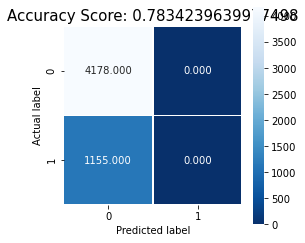

In [13]:
from sklearn import metrics 
import seaborn as sns

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [14]:
#prediction probabilities comprising of 0 and 1 classes - > 0,1 respectively
pred_prob=log_model.predict_proba(X_test)
pred_prob

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

In [15]:
#The sum of predicted probabilities for each sample
prob_sum = np.sum(pred_prob,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [16]:
#The Shape of predicted probabilities array
prob_sum.shape

(5333,)

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [17]:
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve
roc_auc_score(y_test,pred_prob[:,1])

0.6201990844642832

_________________________________________________________________________
**Now, plot the ROC curve.**


In [18]:
#Plotting The ROC Curve :
fpr,tpr,thres=roc_curve(y_test,pred_prob[:,1])

In [19]:
thres

array([1.48298465, 0.48298465, 0.46600867, 0.44911106, 0.4323301 ,
       0.415703  , 0.3992656 , 0.38305207, 0.3670946 , 0.35142324,
       0.33606566, 0.321047  , 0.30638978, 0.29211383, 0.27823623,
       0.26477132, 0.25173076, 0.23912359, 0.2269563 , 0.21523299,
       0.20395547, 0.19312344, 0.18273464, 0.17278502, 0.16326891,
       0.15417922, 0.14550758, 0.13724452, 0.12937966, 0.12190182,
       0.11479918, 0.10805946, 0.10166997, 0.09561779, 0.08988983,
       0.08447295, 0.07935404, 0.07452008, 0.0699582 , 0.06565578,
       0.06160044, 0.05778008, 0.05418298, 0.05079775, 0.04761337,
       0.04461922, 0.0418051 , 0.03916119, 0.03667808, 0.0343468 ,
       0.03215875, 0.03010574, 0.02817998, 0.02637405, 0.02468092,
       0.0230939 , 0.02021324, 0.01890793, 0.01654057, 0.01546869,
       0.01446524, 0.01033455, 0.00844134, 0.0078901 , 0.00644178])

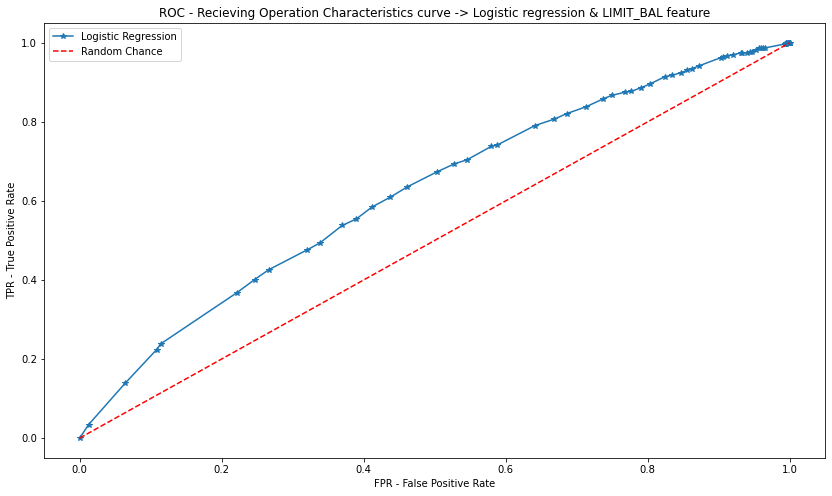

In [20]:
plt.figure(figsize=(14,8))
plt.plot(fpr,tpr,"*-")
plt.plot([0,1],[0,1],'r--')

plt.xlabel('FPR - False Positive Rate')
plt.ylabel('TPR - True Positive Rate')
plt.title('ROC - Recieving Operation Characteristics curve -> Logistic regression & LIMIT_BAL feature')
plt.legend(['Logistic Regression','Random Chance'])

In [21]:
# Get the best threshold value using argmax
from numpy import argmax
J = tpr - fpr
ix = argmax(J)
best_thresh = thres[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.278236


In [22]:
# Calculating the prediction value using 0.27 threshold value
preds = np.where(log_model.predict_proba(X_test)[:,1] > best_thresh, 1, 0)
preds

array([0, 1, 0, ..., 1, 0, 1])

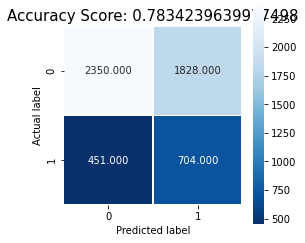

In [23]:
from sklearn import metrics 
import seaborn as sns

cm = metrics.confusion_matrix(y_test, preds)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [24]:
from sklearn.metrics import precision_recall_curve,precision_score,precision_recall_fscore_support
precision,recall,thresh1=precision_recall_curve(y_test,pred_prob[:,1])

In [25]:
thresh1

array([0.0078901 , 0.00844134, 0.01033455, 0.01264696, 0.01446524,
       0.01546869, 0.01654057, 0.01890793, 0.02021324, 0.02160667,
       0.0230939 , 0.02468092, 0.02637405, 0.02817998, 0.03010574,
       0.03215875, 0.0343468 , 0.03667808, 0.03916119, 0.0418051 ,
       0.04461922, 0.04761337, 0.05079775, 0.05418298, 0.05778008,
       0.06160044, 0.06565578, 0.0699582 , 0.07452008, 0.07935404,
       0.08447295, 0.08988983, 0.09561779, 0.10166997, 0.10805946,
       0.11479918, 0.12190182, 0.12937966, 0.13724452, 0.14550758,
       0.15417922, 0.16326891, 0.17278502, 0.18273464, 0.19312344,
       0.20395547, 0.21523299, 0.2269563 , 0.23912359, 0.25173076,
       0.26477132, 0.27823623, 0.29211383, 0.30638978, 0.321047  ,
       0.33606566, 0.35142324, 0.3670946 , 0.38305207, 0.3992656 ,
       0.415703  , 0.4323301 , 0.44911106, 0.46600867, 0.48298465])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'Precision and recall Curve - >  logistic regression & LIMIT_BAL')

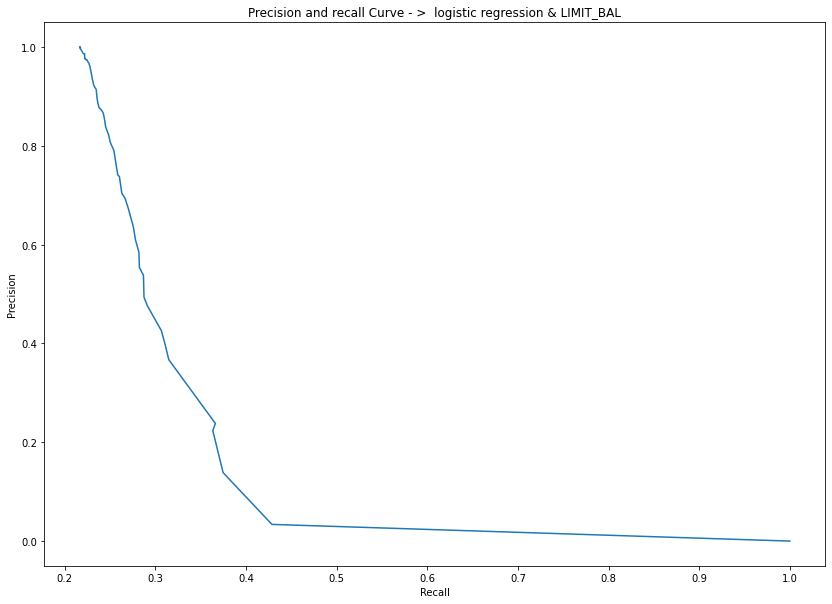

In [26]:
plt.figure(figsize=(14,10))
plt.plot(precision,recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall Curve - >  logistic regression & LIMIT_BAL')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [27]:
#Area Under Curve - > AUC :
from sklearn.metrics import auc
auc(recall,precision)

0.31566964427378624

In [28]:
roc_auc_score(y_test,pred_prob[:,1])

0.6201990844642832

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [29]:
#For Training Data :
xtrain_pred=log_model.predict(X_train)
xtrain_pred_proba=log_model.predict_proba(X_train)
xtrain_pred_proba                #Prediction Probablities for classes 0,1 Respectively

array([[0.69361022, 0.30638978],
       [0.78476701, 0.21523299],
       [0.94581702, 0.05418298],
       ...,
       [0.55088894, 0.44911106],
       [0.73522868, 0.26477132],
       [0.92064596, 0.07935404]])

In [30]:
roc_auc_score(y_train,xtrain_pred_proba[:,1])

0.6182918113358344

    How is this different, conceptually and quantitatively, from your earlier calculation?
